## Import Dependencies

In [84]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Inspecting Datasets

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plotting First 2 Observations From Training Data

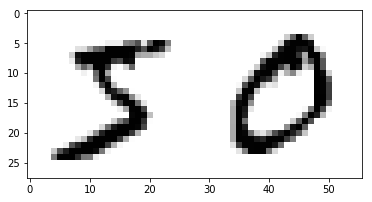

In [86]:
img0, img1 = X_train[0:2]
imgs = np.hstack([img0, img1])
plt.imshow(imgs, cmap="binary")

## Printing First 2 Targets From Training Data

In [87]:
print(y_train[0])
print(y_train[1])

5
0


## Preprocessing Predictors & Targets

In [88]:
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32')
X_train /= 255

input_shape = (X_train.shape[1],)

X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32')
X_test /= 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Inspecting Datasets After Preprocessing

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 11s 255us/step - loss: 0.2337 - acc: 0.9322 - val_loss: 0.1327 - val_acc: 0.9599
Epoch 2/30
42000/42000 [==============================] - 10s 230us/step - loss: 0.0929 - acc: 0.9716 - val_loss: 0.1106 - val_acc: 0.9660
Epoch 3/30
42000/42000 [==============================] - 10s 229us/step - loss: 0.0598 - acc: 0.9814 - val_loss: 0.1001 - val_acc: 0.9721
Epoch 4/30
42000/42000 [==============================] - 10s 233us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0980 - val_acc: 0.9710
Epoch 5/30
42000/42000 [==============================] - 10s 234us/step - loss: 0.0286 - acc: 0.9906 - val_loss: 0.0913 - val_acc: 0.9743
Epoch 6/30
42000/42000 [==============================] - 10s 235us/step - loss: 0.0207 - acc: 0.9934 - val_loss: 0.0930 - val_acc: 0.9756
Epoch 7/30
42000/42000 [==============================] - 10s 231us/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.

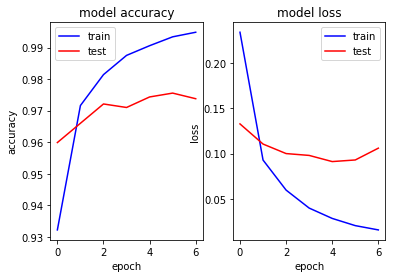

In [90]:
model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(patience=2)
hist_callback = model_1.fit(X_train, y_train, validation_split=0.3, epochs=30, callbacks=[callback])

model_json = model_1.to_json()
with open("model.json","w") as file:
    file.write(model_json)
model_1.save_weights("model.h5")

plt.clf()
plt.subplot(1,2,1)
plt.plot(hist_callback.history['acc'], color='b')
plt.plot(hist_callback.history['val_acc'], color='r')
plt.title('model accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(hist_callback.history['loss'], color='b')
plt.plot(hist_callback.history['val_loss'], color='r')
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper right')